In [203]:
# --- Main libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# So that plots show directly inside the notebook
%matplotlib inline

import pandas as pd

df = pd.read_csv("players_21.csv")
df.head() 







,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [204]:
# Keep only the useful columns
useful_columns = ['short_name', 'age', 'overall', 'potential', 'value_eur', 'player_positions']
df = df[useful_columns]

# Remove missing values
df = df.dropna()

# Create a new column for growth potential (potential - overall)
df["growth_potential"] = df["potential"] - df["overall"]

# Show the first few rows to check the result
df.head() 


,short_name,age,overall,potential,value_eur,player_positions,growth_potential
0,L. Messi,33,93,93,67500000,"RW, ST, CF",0
1,Cristiano Ronaldo,35,92,92,46000000,"ST, LW",0
2,J. Oblak,27,91,93,75000000,GK,2
3,R. Lewandowski,31,91,91,80000000,ST,0
4,Neymar Jr,28,91,91,90000000,"LW, CAM",0


In [205]:

print(df.shape) 
print(df.info())
print(df.describe())

# Check for missing values
print(df.isna().sum())

# Example of unique positions
print(df['player_positions'].unique()[:10])


(18944, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   short_name        18944 non-null  object
 1   age               18944 non-null  int64 
 2   overall           18944 non-null  int64 
 3   potential         18944 non-null  int64 
 4   value_eur         18944 non-null  int64 
 5   player_positions  18944 non-null  object
 6   growth_potential  18944 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.0+ MB
None
                age       overall     potential     value_eur  \
count  18944.000000  18944.000000  18944.000000  1.894400e+04   
mean      25.225823     65.677787     71.086729  2.224813e+06   
std        4.697354      7.002278      6.109985  5.102486e+06   
min       16.000000     47.000000     47.000000  0.000000e+00   
25%       21.000000     61.000000     67.000000  3.000000e+05   
50%       25.000000   

In [206]:
!pip install seaborn


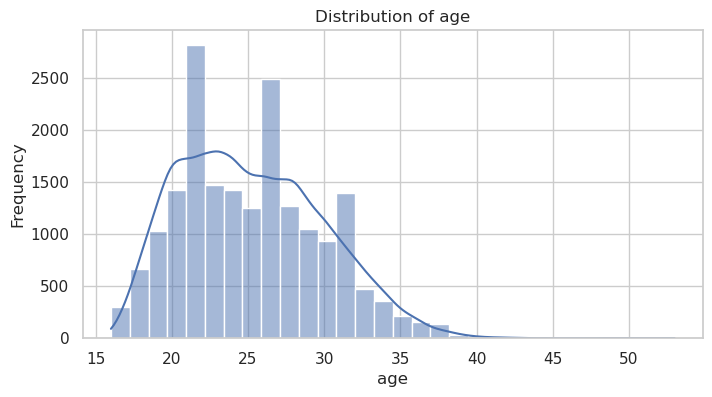

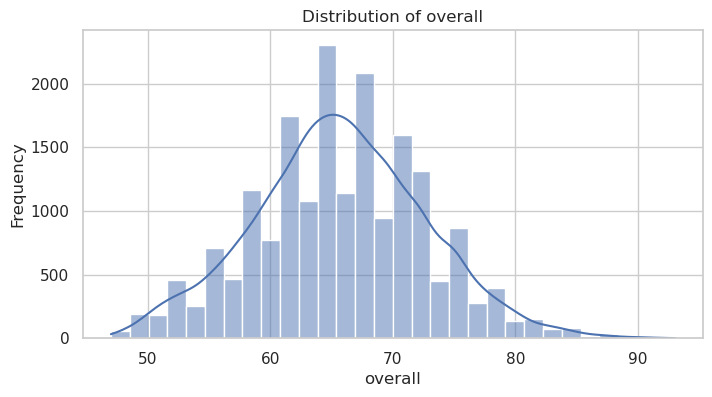

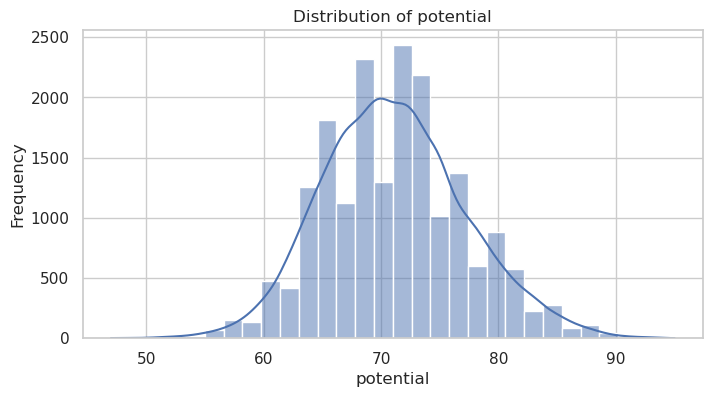

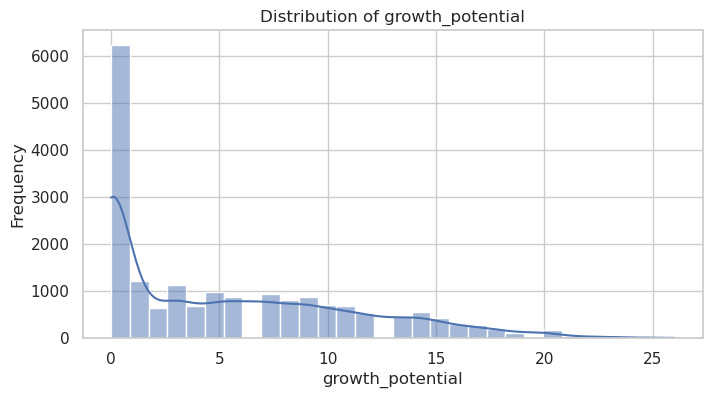

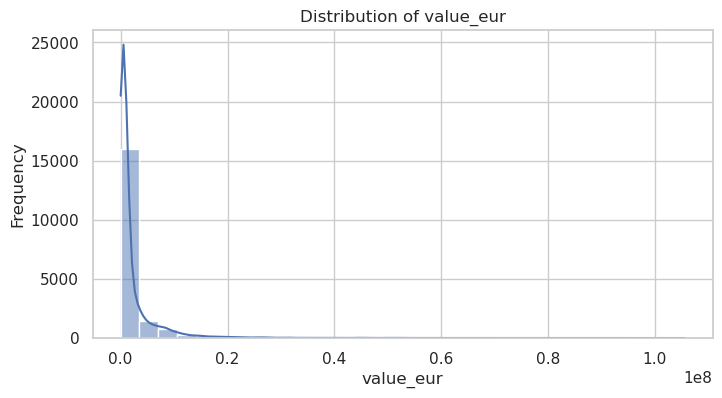

In [207]:
import seaborn as sns

# Set a clean visual style
sns.set(style="whitegrid")

# Plot histograms for key numerical features
numeric_columns = ['age', 'overall', 'potential', 'growth_potential', 'value_eur']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


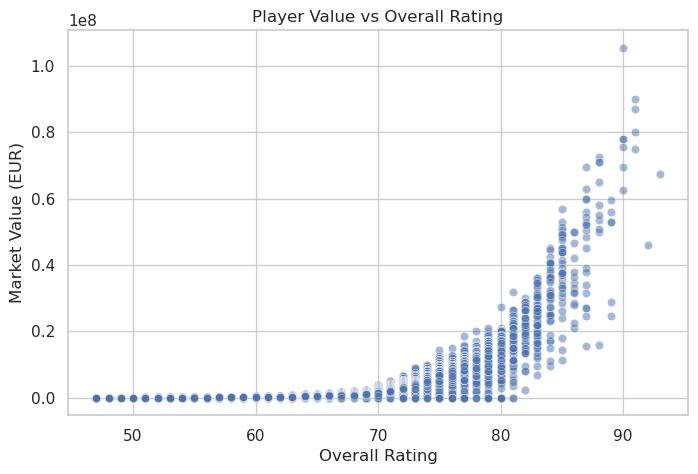

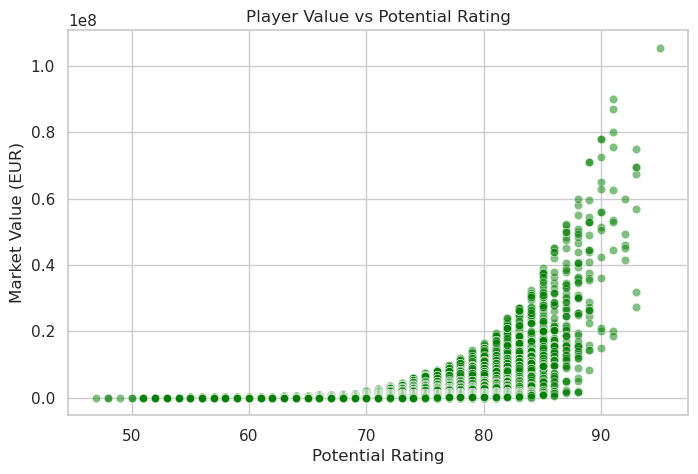

In [208]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='overall', y='value_eur', alpha=0.5)
plt.title("Player Value vs Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Market Value (EUR)")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='potential', y='value_eur', alpha=0.5, color='green')
plt.title("Player Value vs Potential Rating")
plt.xlabel("Potential Rating")
plt.ylabel("Market Value (EUR)")
plt.show()


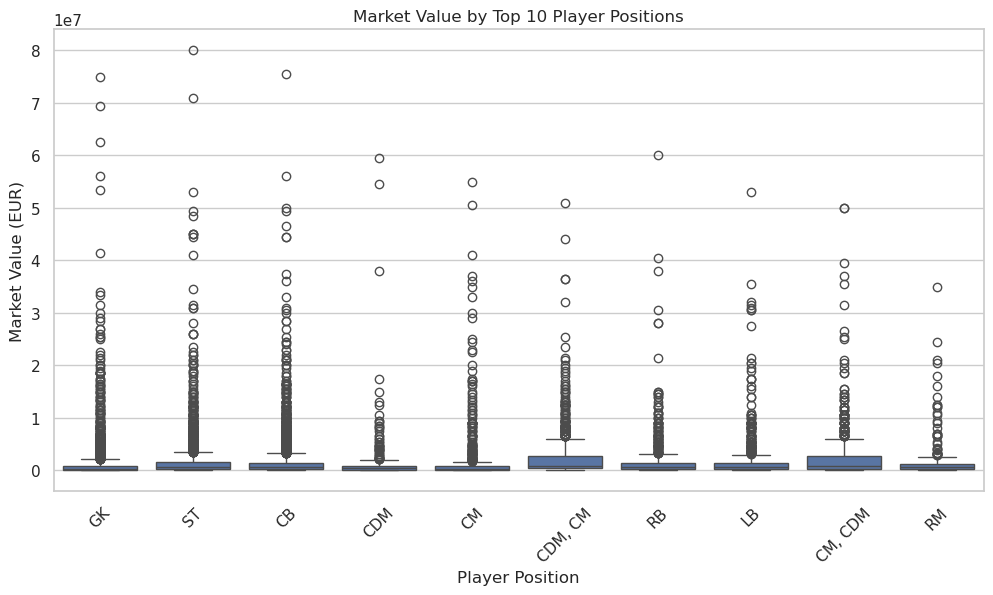

In [209]:
# Count how many players there are per position
top_positions = df['player_positions'].value_counts().head(10).index

# Keep only players in those top positions
df_top = df[df['player_positions'].isin(top_positions)]

# Plot again
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='player_positions', y='value_eur')
plt.xticks(rotation=45)
plt.title("Market Value by Top 10 Player Positions")
plt.xlabel("Player Position")
plt.ylabel("Market Value (EUR)")
plt.show()



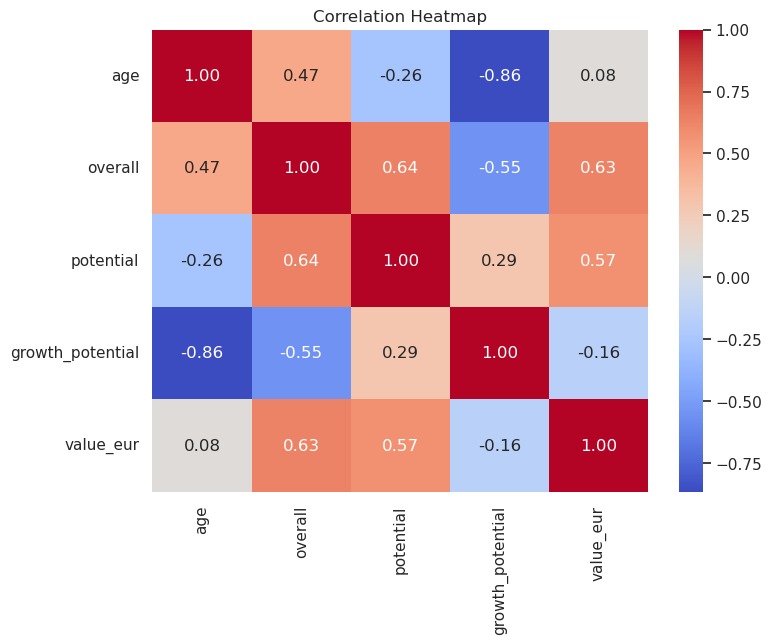

In [210]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'overall', 'potential', 'growth_potential', 'value_eur']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [211]:
import os
import pandas as pd

# If df is not defined, try to load the CSV from the working directory
try:
    df
except NameError:
    csv_path = "players_21.csv"
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        print(f"Loaded '{csv_path}' into df.")
    else:
        raise FileNotFoundError(f"Dataframe 'df' undefined and file '{csv_path}' not found in working directory.")

# 1) Show actual columns present
print("Columns present in the dataset (total {}):\n".format(len(df.columns)))
print(list(df.columns))

# 2) Desired columns list (adjust names later if needed)
desired_columns = [
    'short_name', 'age', 'height_cm', 'weight_kg', 'nationality',
    'overall', 'potential', 'international_reputation', 'skill_moves', 'work_rate',
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'player_positions', 'value_eur'
]

# 3) Keep only columns that actually exist in df
available_columns = [c for c in desired_columns if c in df.columns]

# 4) Report missing columns
missing_columns = [c for c in desired_columns if c not in df.columns]

print("\nColumns kept (found in dataset):")
print(available_columns)

if missing_columns:
    print("\nColumns missing (not found in dataset):")
    print(missing_columns)
    print("\nIf some columns exist under different names, rename them with df.rename(...).")
else:
    print("\nAll desired columns were found.")

# 5) Safe selection
df = df[available_columns].copy()
print("\nDataset shape after selecting available columns:", df.shape)

# 6) Quick preview
display(df.head())


Columns present in the dataset (total 7):

['short_name', 'age', 'overall', 'potential', 'value_eur', 'player_positions', 'growth_potential']

Columns kept (found in dataset):
['short_name', 'age', 'overall', 'potential', 'player_positions', 'value_eur']

Columns missing (not found in dataset):
['height_cm', 'weight_kg', 'nationality', 'international_reputation', 'skill_moves', 'work_rate', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

If some columns exist under different names, rename them with df.rename(...).

Dataset shape after selecting available columns: (18944, 6)


,short_name,age,overall,potential,player_positions,value_eur
0,L. Messi,33,93,93,"RW, ST, CF",67500000
1,Cristiano Ronaldo,35,92,92,"ST, LW",46000000
2,J. Oblak,27,91,93,GK,75000000
3,R. Lewandowski,31,91,91,ST,80000000
4,Neymar Jr,28,91,91,"LW, CAM",90000000


In [212]:
# --- Extraire une position principale proprement et créer un groupe de postes ---
import re

# 1) Vérifier le nom de la colonne (certains fichiers peuvent l'appeler différemment)
possible_names = ['player_positions', 'positions', 'position', 'player_pos']
pos_col = None
for name in possible_names:
    if name in df.columns:
        pos_col = name
        break

if pos_col is None:
    raise KeyError("Aucune colonne de positions trouvée. Cherche dans df.columns et renomme la colonne correspondante en 'player_positions' ou 'positions'.")

print(f"Using positions column: '{pos_col}'")

# 2) Fonction robuste pour extraire la position principale
def extract_main_position(pos):
    """
    Input examples:
      - "ST, LW, CF"
      - "CM"
      - "GK"
      - nan
      - "RB, RWB"
    Returns uppercase short token like 'ST', 'CM', 'GK' etc. or 'UNKNOWN' if not parseable.
    """
    if pd.isna(pos):
        return "UNKNOWN"
    # ensure string
    s = str(pos).strip()
    if s == "":
        return "UNKNOWN"
    # replace common separators by comma, remove extra spaces
    s = re.sub(r'[;/|]', ',', s)
    parts = [p.strip().upper() for p in s.split(',') if p.strip() != ""]
    if len(parts) == 0:
        return "UNKNOWN"
    # choose first token that looks like a position (2-4 chars typically)
    for p in parts:
        if 1 <= len(p) <= 5:
            return p
    return parts[0]  # fallback

# Apply extraction (creates 'main_position')
df['main_position'] = df[pos_col].apply(extract_main_position)

# 3) Regrouper les positions en grandes familles (Goalkeeper, Defender, Midfielder, Forward, Other)
def map_position_group(pos):
    pos = str(pos).upper()
    if 'GK' in pos:
        return 'Goalkeeper'
    if any(x in pos for x in ['CB','LB','RB','LWB','RWB','SW']):
        return 'Defender'
    if any(x in pos for x in ['CM','CDM','CAM','RM','LM','DM','MF']):
        return 'Midfielder'
    if any(x in pos for x in ['ST','CF','LW','RW','FW','AM','SS']):
        return 'Forward'
    return 'Other'

df['position_group'] = df['main_position'].apply(map_position_group)

# 4) Rapide vérification / résumé pour s'assurer que tout est ok
print("\nMain positions sample (first 20):")
display(df[['short_name', pos_col, 'main_position', 'position_group']].head(20))

print("\nCounts by main_position (top 20):")
display(df['main_position'].value_counts().head(20))

print("\nCounts by position_group:")
display(df['position_group'].value_counts())

# 5) (Optionnel) si tu veux, tu peux remplacer 'player_positions' par 'main_position' pour la suite
# df.drop(columns=[pos_col], inplace=True)      # à décommenter si souhaité
# df.rename(columns={'main_position': 'player_positions'}, inplace=True)  # ou adaptation



Using positions column: 'player_positions'

Main positions sample (first 20):


,short_name,player_positions,main_position,position_group
0,L. Messi,"RW, ST, CF",RW,Forward
1,Cristiano Ronaldo,"ST, LW",ST,Forward
2,J. Oblak,GK,GK,Goalkeeper
3,R. Lewandowski,ST,ST,Forward
4,Neymar Jr,"LW, CAM",LW,Forward
5,K. De Bruyne,"CAM, CM",CAM,Midfielder
6,K. Mbappé,"ST, LW, RW",ST,Forward
7,M. ter Stegen,GK,GK,Goalkeeper
8,V. van Dijk,CB,CB,Defender
9,Alisson,GK,GK,Goalkeeper



Counts by main_position (top 20):


main_position
CB     3252
ST     2645
CM     2241
GK     2084
CDM    1514
LB     1402
RB     1363
CAM    1148
LM     1069
RM     1065
RW      438
LW      420
CF      115
LWB     100
RWB      88
Name: count, dtype: int64


Counts by position_group:


position_group
Midfielder    7037
Defender      6205
Forward       3618
Goalkeeper    2084
Name: count, dtype: int64

In [213]:
# --- Growth potential ---
df["growth_potential"] = df["potential"] - df["overall"]

print(df[["short_name", "overall", "potential", "growth_potential"]].head(10))


          short_name  overall  potential  growth_potential
0           L. Messi       93         93                 0
1  Cristiano Ronaldo       92         92                 0
2           J. Oblak       91         93                 2
3     R. Lewandowski       91         91                 0
4          Neymar Jr       91         91                 0
5       K. De Bruyne       91         91                 0
6          K. Mbappé       90         95                 5
7      M. ter Stegen       90         93                 3
8        V. van Dijk       90         91                 1
9            Alisson       90         91                 1


In [214]:
# --- Convert market value to millions of euros ---
df["value_million"] = df["value_eur"] / 1_000_000

print(df[["short_name", "value_eur", "value_million"]].head(10))


          short_name  value_eur  value_million
0           L. Messi   67500000           67.5
1  Cristiano Ronaldo   46000000           46.0
2           J. Oblak   75000000           75.0
3     R. Lewandowski   80000000           80.0
4          Neymar Jr   90000000           90.0
5       K. De Bruyne   87000000           87.0
6          K. Mbappé  105500000          105.5
7      M. ter Stegen   69500000           69.5
8        V. van Dijk   75500000           75.5
9            Alisson   62500000           62.5


In [215]:
numeric_cols = ["age", "overall", "potential", "value_eur", 
                "growth_potential", "value_million"]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

df[numeric_cols].describe()


,age,overall,potential,value_eur,growth_potential,value_million
count,18944.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000
mean,25.225823,65.677787,71.086729,2.224813e+06,5.408942,2.224813
std,4.697354,7.002278,6.109985,5.102486e+06,5.649024,5.102486
min,16.000000,47.000000,47.000000,0.000000e+00,0.000000,0.000000
25%,21.000000,61.000000,67.000000,3.000000e+05,0.000000,0.300000
50%,25.000000,66.000000,71.000000,6.500000e+05,4.000000,0.650000
75%,29.000000,70.000000,75.000000,1.800000e+06,9.000000,1.800000
max,53.000000,93.000000,95.000000,1.055000e+08,26.000000,105.500000


In [216]:
# --- One-hot encoding for position_group ---
df = pd.get_dummies(df, columns=["position_group"], prefix="pos", drop_first=True)

df.head()


,short_name,age,overall,potential,player_positions,value_eur,main_position,growth_potential,value_million,pos_Forward,pos_Goalkeeper,pos_Midfielder
0,L. Messi,33,93,93,"RW, ST, CF",67500000,RW,0,67.5,True,False,False
1,Cristiano Ronaldo,35,92,92,"ST, LW",46000000,ST,0,46.0,True,False,False
2,J. Oblak,27,91,93,GK,75000000,GK,2,75.0,False,True,False
3,R. Lewandowski,31,91,91,ST,80000000,ST,0,80.0,True,False,False
4,Neymar Jr,28,91,91,"LW, CAM",90000000,LW,0,90.0,True,False,False


In [217]:
# --- Select final features for the model ---

# Find all columns that start with pos_ (one-hot)
position_dummies = [col for col in df.columns if col.startswith("pos_")]

feature_columns = [
    "age",
    "overall",
    "potential",
    "growth_potential"
] + position_dummies

print("Final feature columns:", feature_columns)


Final feature columns: ['age', 'overall', 'potential', 'growth_potential', 'pos_Forward', 'pos_Goalkeeper', 'pos_Midfielder']


In [218]:

# --- Define X (inputs) and y (target) ---
X = df[feature_columns]
y = df["value_million"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (18944, 7)
y shape: (18944,)


In [219]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)



Training set: (15155, 7)
Test set: (3789, 7)


In [220]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit ONLY on training data (important!! never fit on test)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling done.")


Scaling done.


Shape X: (16861, 12) Shape y: (16861,)
Scaling done.
X_train_scaled shape: (13488, 12)
X_test_scaled shape: (3373, 12)
------ Linear Regression ------
MAE :  2,034,162.02 €
RMSE: 3,904,807.77 €
R² :   0.4627
---------------------------



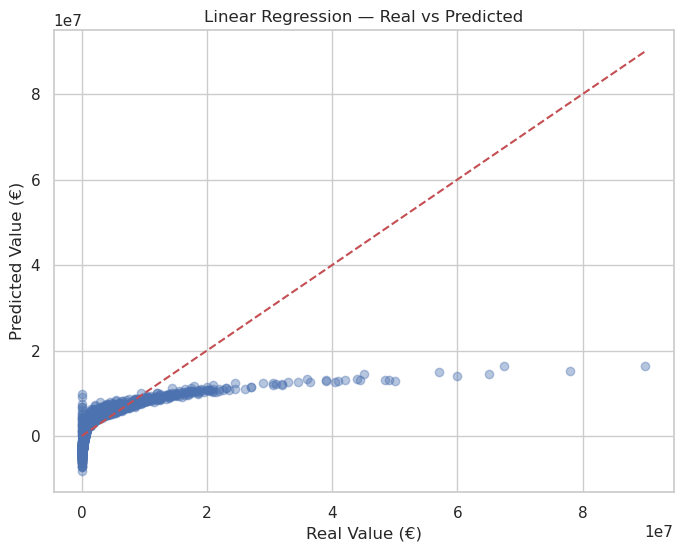

------ Ridge Regression ------
MAE :  2,034,099.56 €
RMSE: 3,904,825.30 €
R² :   0.4627
---------------------------



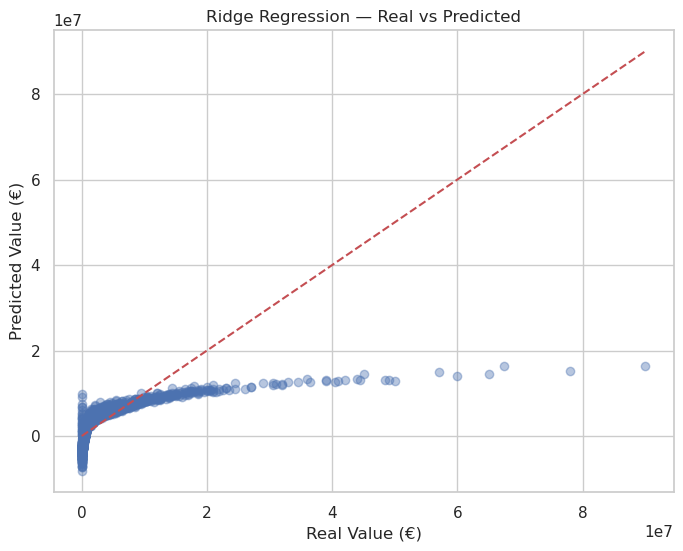

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ------------------------------
# 1. LOAD DATA
# ------------------------------
df = pd.read_csv("players_21.csv")

# ------------------------------
# 2. CREATE NECESSARY FEATURES
# ------------------------------
# Main position (take first listed position)
df["main_position"] = df["player_positions"].apply(lambda x: x.split(",")[0].strip() if isinstance(x, str) else "Unknown")

# Growth potential
df["growth_potential"] = df["potential"] - df["overall"]

# ------------------------------
# 3. SELECT FEATURES AND TARGET
# ------------------------------
categorical_cols = []  # Linear/Ridge can't handle strings directly, so skip categorical
numerical_cols = [
    "age", "height_cm", "weight_kg", "overall", "potential", "growth_potential",
    "pace", "shooting", "passing", "dribbling", "defending", "physic"
]

# Keep only existing columns
numerical_cols = [c for c in numerical_cols if c in df.columns]

# Keep only numerical columns + target
cols_to_keep = numerical_cols + ["value_eur"]
df = df[cols_to_keep].dropna()  # remove rows with NaNs

# Features and target
X = df[numerical_cols]
y = df["value_eur"]

print("Shape X:", X.shape, "Shape y:", y.shape)

# ------------------------------
# 4. TRAIN / TEST SPLIT
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 5. SCALING
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling done.")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

# ------------------------------
# 6. FIT MODELS
# ------------------------------
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# ------------------------------
# 7. EVALUATION FUNCTION
# ------------------------------
def evaluate(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"------ {model_name} ------")
    print(f"MAE :  {mae:,.2f} €")
    print(f"RMSE: {rmse:,.2f} €")
    print(f"R² :   {r2:.4f}")
    print("---------------------------\n")
    
    # Graph
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha=0.4)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             "r--")
    plt.xlabel("Real Value (€)")
    plt.ylabel("Predicted Value (€)")
    plt.title(f"{model_name} — Real vs Predicted")
    plt.show()

# ------------------------------
# 8. EVALUATE MODELS
# ------------------------------
evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Ridge Regression", y_test, y_pred_ridge)


In [222]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- 1. LINEAR REGRESSION ---
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

# --- 2. RIDGE REGRESSION ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

# --- 3. Evaluation Function ---
def evaluate(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"------ {model_name} ------")
    print(f"MAE :  {mae:,.2f} €")
    print(f"RMSE : {rmse:,.2f} €")
    print(f"R² :   {r2:.4f}")
    print("---------------------------\n")

# --- 4. Evaluate the models ---
evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Ridge Regression", y_test, y_pred_ridge)


------ Linear Regression ------
MAE :  2,034,162.02 €
RMSE : 3,904,807.77 €
R² :   0.4627
---------------------------

------ Ridge Regression ------
MAE :  2,034,099.56 €
RMSE : 3,904,825.30 €
R² :   0.4627
---------------------------



------ Random Forest Results ------
MAE : 134699.57 €
RMSE: 619786.36 €
R²:  0.9865
-----------------------------------


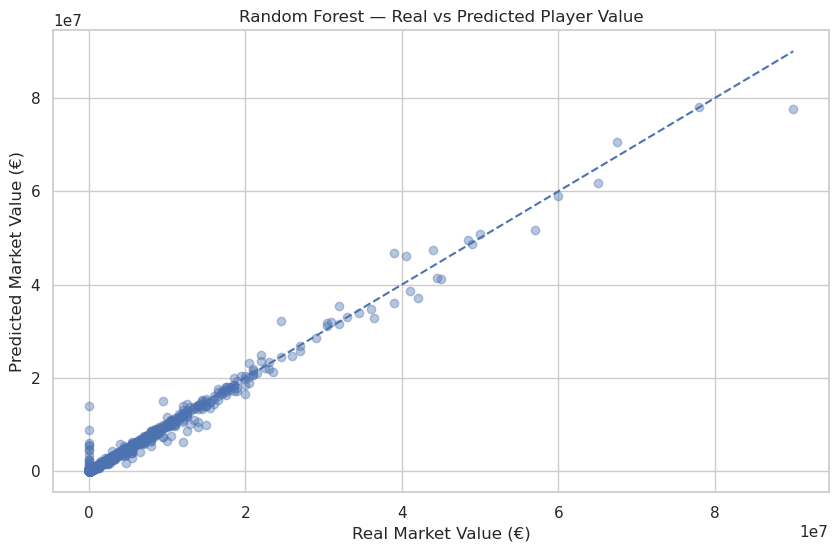

In [224]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. LOAD DATA
# ---------------------------------------------------------
df = pd.read_csv("players_21.csv")

# ---------------------------------------------------------
# 2. CREATE NECESSARY FEATURES
# ---------------------------------------------------------
df["main_position"] = df["player_positions"].apply(lambda x: x.split(",")[0].strip())
df["growth_potential"] = df["potential"] - df["overall"]
df["value_million"] = df["value_eur"] / 1_000_000

# ---------------------------------------------------------
# 3. COLUMNS SELECTION
# ---------------------------------------------------------
categorical_cols = ["main_position"]  # only 1 categorical → avoids crash

numerical_cols = [
    "age", "height_cm", "weight_kg",
    "overall", "potential", "growth_potential",
    "pace", "shooting", "passing", 
    "dribbling", "defending", "physic"
]

# Keep only existing
categorical_cols = [c for c in categorical_cols if c in df.columns]
numerical_cols = [c for c in numerical_cols if c in df.columns]

df = df[categorical_cols + numerical_cols + ["value_eur"]].dropna()

# ---------------------------------------------------------
# 4. TRAIN/TEST
# ---------------------------------------------------------
X = df[categorical_cols + numerical_cols]
y = df["value_eur"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------------
# 5. PIPELINE
# ---------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=18,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", model)
])

# ---------------------------------------------------------
# 6. FIT
# ---------------------------------------------------------
pipeline.fit(X_train, y_train)

# ---------------------------------------------------------
# 7. EVALUATE
# ---------------------------------------------------------
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("------ Random Forest Results ------")
print(f"MAE : {mae:.2f} €")
print(f"RMSE: {rmse:.2f} €")
print(f"R²:  {r2:.4f}")
print("-----------------------------------")

# ---------------------------------------------------------
# 8. GRAPH
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Real Market Value (€)")
plt.ylabel("Predicted Market Value (€)")
plt.title("Random Forest — Real vs Predicted Player Value")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.show()
